# Imports and set up

In [ ]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

from statsmodels.graphics.tsaplots import month_plot, quarter_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
aapl_df = pd.read_csv("../data/aapl.csv", parse_dates=["Date"], index_col=["Date"]) # import the data to a df, sets the Date column as DateTime and also sets it as the index

In [4]:
pd.set_option('display.float_format', '{:,.3f}'.format) #sets some global number formats which should make the data easier to read.

# Addind Date Columns

In [5]:
aapl_df["Year"] = aapl_df.index.year
aapl_df["Month"] = aapl_df.index.month
aapl_df["Day"] = aapl_df.index.day
aapl_df["weekday"] = aapl_df.index.weekday

# this adds a year, month and day column to the data. 

In [6]:
aapl_df.tail()

,Close,High,Low,Open,Volume,Year,Month,Day,weekday
Date,,,,,,,,,
2025-08-07,219.781,220.600,216.334,218.632,90224800,2025,8,7,3
2025-08-08,229.090,230.738,219.001,220.580,113854000,2025,8,8,4
2025-08-11,227.180,229.560,224.760,227.920,61806100,2025,8,11,0
2025-08-12,229.650,230.800,227.070,228.010,55626200,2025,8,12,1
2025-08-13,233.330,235.000,230.430,231.070,69833200,2025,8,13,2


# Initial EDA

## Basics

In [7]:
aapl_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11258 entries, 1980-12-12 to 2025-08-13
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Close    11258 non-null  float64
 1   High     11258 non-null  float64
 2   Low      11258 non-null  float64
 3   Open     11258 non-null  float64
 4   Volume   11258 non-null  int64  
 5   Year     11258 non-null  int32  
 6   Month    11258 non-null  int32  
 7   Day      11258 non-null  int32  
 8   weekday  11258 non-null  int32  
dtypes: float64(4), int32(4), int64(1)
memory usage: 703.6 KB


In [8]:
print(aapl_df.head())
print(aapl_df.tail())

            Close  High   Low  Open     Volume  Year  Month  Day  weekday
Date                                                                     
1980-12-12  0.098 0.099 0.098 0.098  469033600  1980     12   12        4
1980-12-15  0.093 0.094 0.093 0.094  175884800  1980     12   15        0
1980-12-16  0.086 0.087 0.086 0.087  105728000  1980     12   16        1
1980-12-17  0.089 0.089 0.089 0.089   86441600  1980     12   17        2
1980-12-18  0.091 0.092 0.091 0.091   73449600  1980     12   18        3
             Close    High     Low    Open     Volume  Year  Month  Day  \
Date                                                                      
2025-08-07 219.781 220.600 216.334 218.632   90224800  2025      8    7   
2025-08-08 229.090 230.738 219.001 220.580  113854000  2025      8    8   
2025-08-11 227.180 229.560 224.760 227.920   61806100  2025      8   11   
2025-08-12 229.650 230.800 227.070 228.010   55626200  2025      8   12   
2025-08-13 233.330 235.000 230.4

In [9]:
aapl_df.isna().sum()

Close      0
High       0
Low        0
Open       0
Volume     0
Year       0
Month      0
Day        0
weekday    0
dtype: int64

In [10]:
aapl_df.describe()

,Close,High,Low,Open,Volume,Year,Month,Day,weekday
count,"11,258.000","11,258.000","11,258.000","11,258.000","11,258.000","11,258.000","11,258.000","11,258.000","11,258.000"
mean,26.009,26.273,25.720,25.988,"311,985,889.092","2,002.754",6.514,15.738,2.018
std,53.997,54.534,53.399,53.940,"333,943,488.822",12.898,3.430,8.748,1.400
min,0.038,0.038,0.038,0.038,0.000,"1,980.000",1.000,1.000,0.000
25%,0.245,0.250,0.239,0.245,"108,355,900.000","1,992.000",4.000,8.000,1.000
50%,0.462,0.469,0.455,0.462,"200,550,000.000","2,003.000",7.000,16.000,2.000
75%,20.341,20.533,20.216,20.377,"391,638,800.000","2,014.000",9.000,23.000,3.000
max,258.104,259.180,256.719,257.277,"7,421,640,800.000","2,025.000",12.000,31.000,4.000


## Find min and max's

In [11]:
aapl_df.loc[aapl_df["Close"].idxmin()] # this returns the full row of the min Close value.

Close               0.038
High                0.038
Low                 0.038
Open                0.038
Volume    164,326,400.000
Year            1,982.000
Month               7.000
Day                 8.000
weekday             3.000
Name: 1982-07-08 00:00:00, dtype: float64

In [12]:
# if just want the min value can use.
aapl_df["Close"].min()

np.float64(0.0376811027526855)

In [13]:
aapl_df.loc[aapl_df["Close"].idxmax()] # same for max

Close            258.104
High             259.180
Low              256.719
Open             257.277
Volume    27,237,100.000
Year           2,024.000
Month             12.000
Day               26.000
weekday            3.000
Name: 2024-12-26 00:00:00, dtype: float64

## Rolling Averages / Daily Returns

In [14]:
aapl_df["7_day_rolling"] = aapl_df["Close"].rolling(window = 7).mean()

<Axes: xlabel='Date'>

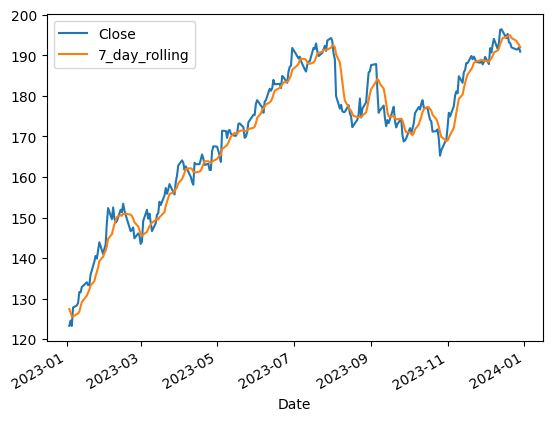

In [15]:
aapl_df[["Close", "7_day_rolling"]].loc["2023"].plot()

In [16]:
aapl_df["daily_returns"] = aapl_df["Close"].pct_change() * 100

In [17]:
aapl_df["30_day_rolling_vol"] = aapl_df["Volume"].rolling(window=30).mean()

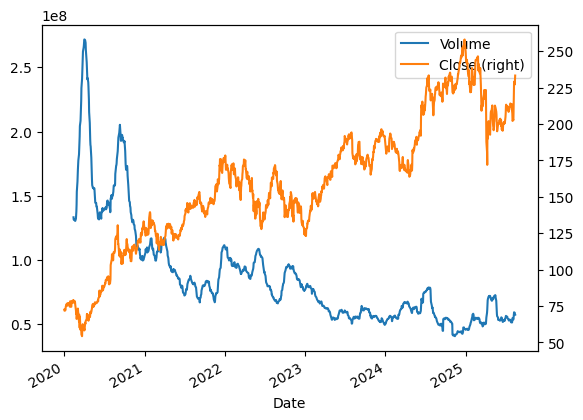

In [18]:
df_2020 = aapl_df.loc["2020":]

df_2020["Volume"].rolling(window=30).mean().plot(legend=True)
ax = df_2020["Close"].plot(secondary_y=True, legend=True)
plt.show()

In [19]:
aapl_df[["Close", "30_day_rolling_vol"]].corr()

,Close,30_day_rolling_vol
Close,1.000,-0.348
30_day_rolling_vol,-0.348,1.000


## Visuals

In [20]:
fig = px.line(aapl_df["Close"], title="Apple Closing Stock")
fig.show()

In [21]:
px.bar(aapl_df["Volume"], 
       title="Apple Stock Info",
       color_discrete_sequence=["red"] )

# Grouping and Filtering

### Grouping

In [22]:
aapl_df.groupby(["Year"]).mean().drop(columns=["Month", "Day"])

,Close,High,Low,Open,Volume,weekday,7_day_rolling,daily_returns,30_day_rolling_vol
Year,,,,,,,,,
1980,0.104,0.105,0.104,0.104,"103,450,092.308",1.846,0.103,1.553,NaN
1981,0.083,0.084,0.083,0.084,"32,398,988.142",1.996,0.084,-0.115,"32,108,352.180"
1982,0.066,0.067,0.065,0.066,"84,446,671.937",2.012,0.065,0.173,"80,484,150.303"
1983,0.128,0.131,0.125,0.128,"175,940,755.731",2.028,0.129,0.007,"175,235,949.618"
1984,0.092,0.094,0.090,0.092,"165,925,033.992",2.016,0.092,0.115,"163,549,105.244"
1985,0.069,0.071,0.069,0.070,"180,524,888.889",2.000,0.069,-0.072,"180,660,728.889"
1986,0.111,0.113,0.109,0.111,"210,763,724.901",2.000,0.110,0.272,"208,388,669.723"
1987,0.267,0.274,0.261,0.267,"236,250,232.411",1.996,0.266,0.377,"236,411,888.696"
1988,0.287,0.292,0.283,0.287,"163,213,350.198",2.028,0.287,0.009,"167,306,423.399"


In [23]:
aapl_df.groupby(["Month"]).mean().drop(columns=["Year", "Day"])

,Close,High,Low,Open,Volume,weekday,7_day_rolling,daily_returns,30_day_rolling_vol
Month,,,,,,,,,
1,25.219,25.506,24.918,25.220,"417,861,654.045",2.076,25.256,0.181,"329,400,587.830"
2,26.286,26.530,25.970,26.233,"319,544,756.199",2.103,26.307,0.089,"375,832,047.516"
3,25.342,25.646,25.029,25.325,"308,070,243.452",1.977,25.357,0.118,"322,543,326.423"
4,25.538,25.841,25.225,25.503,"321,290,043.656",1.927,25.536,0.180,"307,702,282.925"
5,26.116,26.373,25.842,26.110,"284,584,379.180",2.097,26.078,0.099,"313,113,363.291"
6,25.976,26.236,25.718,25.954,"282,359,396.559",1.999,25.824,-0.094,"287,300,594.042"
7,28.477,28.717,28.191,28.435,"289,798,425.525",2.001,28.255,0.151,"281,235,840.343"
8,27.111,27.373,26.818,27.069,"271,007,441.667",1.995,26.905,0.251,"289,784,219.533"
9,25.101,25.412,24.822,25.163,"313,134,343.289",2.097,25.249,-0.217,"279,319,335.362"


In [24]:
aapl_df.groupby(["Year", "Month"]).mean().drop(columns=["Day"])

Close    High     Low    Open          Volume  weekday  \
Year Month                                                            
1980 12      0.104   0.105   0.104   0.104 103,450,092.308    1.846   
1981 1       0.108   0.109   0.108   0.109  28,999,466.667    2.095   
     2       0.090   0.091   0.090   0.091  16,927,326.316    2.105   
     3       0.085   0.086   0.085   0.085  31,850,763.636    1.864   
     4       0.093   0.094   0.093   0.093  25,568,000.000    1.952   
...            ...     ...     ...     ...             ...      ...   
2025 4     200.693 204.781 195.771 199.278  76,538,980.952    1.857   
     5     203.628 205.637 201.265 203.799  56,939,438.095    2.238   
     6     200.430 202.595 198.756 200.673  55,020,465.000    1.850   
     7     211.041 212.952 209.617 211.099  49,087,981.818    1.909   
     8     217.778 220.880 214.179 216.632  80,391,811.111    1.889   

            7_day_rolling  daily_returns  30_day_rolling_vol  
Year Month                                                    
1980 12             0.103          1.553                 NaN  
1981 1              0.111         -0.851      44,473,557.333  
     2              0.093         -0.267      26,501,164.912  
     3              0.085         -0.303      24,312,315.152  
     4              0.092          0.758      28,888,426.667  
...                   ...            ...                 ...  
2025 4            202.251         -0.096      65,733,793.968  
     5            205.096         -0.241      65,640,970.317  
     6            200.086          0.113      53,499,537.833  
     7            209.924          0.057      53,762,120.455  
     8            211.708          1.348      56,591,474.815  

[537 rows x 9 columns]

In [25]:
aapl_df.groupby([pd.Grouper(freq="ME")]).mean().drop(columns=["Year", "Month", "Day"])

,Close,High,Low,Open,Volume,weekday,7_day_rolling,daily_returns,30_day_rolling_vol
Date,,,,,,,,,
1980-12-31,0.104,0.105,0.104,0.104,"103,450,092.308",1.846,0.103,1.553,NaN
1981-01-31,0.108,0.109,0.108,0.109,"28,999,466.667",2.095,0.111,-0.851,"44,473,557.333"
1981-02-28,0.090,0.091,0.090,0.091,"16,927,326.316",2.105,0.093,-0.267,"26,501,164.912"
1981-03-31,0.085,0.086,0.085,0.085,"31,850,763.636",1.864,0.085,-0.303,"24,312,315.152"
1981-04-30,0.093,0.094,0.093,0.093,"25,568,000.000",1.952,0.092,0.758,"28,888,426.667"
...,...,...,...,...,...,...,...,...,...
2025-04-30,200.693,204.781,195.771,199.278,"76,538,980.952",1.857,202.251,-0.096,"65,733,793.968"
2025-05-31,203.628,205.637,201.265,203.799,"56,939,438.095",2.238,205.096,-0.241,"65,640,970.317"
2025-06-30,200.430,202.595,198.756,200.673,"55,020,465.000",1.850,200.086,0.113,"53,499,537.833"


In [26]:
monthly_df = aapl_df.resample("ME").mean().drop(columns=["Year", "Month", "Day"])

In [27]:
px.line(monthly_df)

In [28]:
daily_df = (aapl_df["Close"]
            .groupby([aapl_df.index.day_of_week,aapl_df.index.month])
            .mean()
            )
daily_df

Date  Date
0     1      23.331
      2      25.928
      3      25.336
      4      25.299
      5      26.270
      6      25.235
      7      28.835
      8      27.033
      9      25.142
      10     25.085
      11     25.388
      12     25.612
1     1      26.208
      2      26.222
      3      25.035
      4      26.189
      5      25.854
      6      26.236
      7      28.343
      8      27.569
      9      24.520
      10     25.685
      11     25.688
      12     26.969
2     1      25.594
      2      26.106
      3      25.637
      4      25.740
      5      26.039
      6      25.656
      7      29.418
      8      27.302
      9      25.031
      10     24.739
      11     25.955
      12     24.756
3     1      24.810
      2      26.978
      3      25.193
      4      25.055
      5      26.133
      6      26.075
      7      27.814
      8      26.798
      9      25.183
      10     24.976
      11     25.523
      12     27.038
4     1      25.815
      2  

In [29]:
daily_df = (aapl_df
            .groupby(["weekday", "Month"])
            .mean()
            .reset_index()
            )
daily_df

,weekday,Month,Close,High,Low,Open,Volume,Year,Day,7_day_rolling,daily_returns,30_day_rolling_vol
0,0,1,23.331,23.529,22.919,23.177,"371,787,229.747","2,001.475",16.810,23.256,0.304,"318,398,665.527"
1,0,2,25.928,26.173,25.650,25.883,"296,870,396.350","2,002.985",13.518,26.040,0.374,"370,119,143.820"
2,0,3,25.336,25.687,24.983,25.296,"292,114,387.437","2,002.935",16.000,25.412,-0.017,"322,664,018.543"
3,0,4,25.299,25.582,25.001,25.261,"286,827,815.544","2,003.016",15.487,25.283,0.168,"306,512,539.430"
4,0,5,26.270,26.484,25.956,26.215,"282,798,887.013","2,003.006",12.481,26.179,0.486,"315,494,170.281"
5,0,6,25.235,25.500,24.941,25.181,"272,834,634.031","2,002.775",15.424,25.121,-0.303,"286,989,358.202"
6,0,7,28.835,29.116,28.589,28.856,"255,458,373.656","2,003.140",16.758,28.629,0.107,"282,747,315.072"
7,0,8,27.033,27.294,26.672,26.949,"247,922,783.333","2,002.626",15.934,26.833,0.189,"287,094,212.593"
8,0,9,25.142,25.328,24.778,25.015,"290,521,611.806","2,002.556",19.069,25.176,0.063,"276,995,233.241"
9,0,10,25.085,25.282,24.763,24.950,"322,042,108.247","2,002.521",15.969,24.970,0.375,"330,190,867.629"


In [30]:
matrix = daily_df.pivot(index="weekday", columns="Month", values="Close")
matrix

Month,1,2,3,4,5,6,7,8,9,10,11,12
weekday,,,,,,,,,,,,
0,23.331,25.928,25.336,25.299,26.270,25.235,28.835,27.033,25.142,25.085,25.388,25.612
1,26.208,26.222,25.035,26.189,25.854,26.236,28.343,27.569,24.520,25.685,25.688,26.969
2,25.594,26.106,25.637,25.740,26.039,25.656,29.418,27.302,25.031,24.739,25.955,24.756
3,24.810,26.978,25.193,25.055,26.133,26.075,27.814,26.798,25.183,24.976,25.523,27.038
4,25.815,26.105,25.519,25.381,26.316,26.676,27.962,26.851,25.640,24.328,25.880,26.696


In [31]:
px.scatter(matrix)

## Filtering

In [32]:
monthly_df.loc[
    (monthly_df.index.year > 2020)
]

,Close,High,Low,Open,Volume,weekday,7_day_rolling,daily_returns,30_day_rolling_vol
Date,,,,,,,,,
2021-01-31,129.631,131.612,127.625,129.693,"117,908,526.316",2.105,128.966,-0.001,"109,277,626.491"
2021-02-28,128.314,129.812,126.751,128.793,"96,518,715.789",2.105,130.531,-0.427,"106,350,307.368"
2021-03-31,118.928,120.490,117.497,119.139,"115,235,573.913",1.870,119.234,0.057,"111,174,105.217"
2021-04-30,128.630,129.702,127.315,128.493,"89,993,214.286",2.048,126.940,0.359,"104,110,097.619"
2021-05-31,123.890,125.232,122.952,124.135,"85,596,745.000",2.000,124.943,-0.247,"90,982,026.167"
2021-06-30,127.036,127.713,125.865,126.577,"73,026,818.182",1.955,125.763,0.435,"80,599,067.273"
2021-07-31,141.875,142.963,140.310,141.319,"91,382,623.810",2.238,140.361,0.310,"80,859,289.365"
2021-08-31,145.023,146.049,143.739,144.703,"66,433,763.636",1.864,144.423,0.196,"79,313,204.545"
2021-09-30,145.188,146.841,144.125,145.869,"85,611,195.238",2.143,146.203,-0.327,"74,796,484.762"


In [33]:
monthly_df.loc[
    (monthly_df.index.year > 2015) & (monthly_df["Close"] > 200)
]

,Close,High,Low,Open,Volume,weekday,7_day_rolling,daily_returns,30_day_rolling_vol
Date,,,,,,,,,
2024-06-30,205.070,207.827,202.741,204.803,"90,418,531.579",2.000,201.854,0.503,"67,049,340.702"
2024-07-31,223.300,225.360,220.746,223.299,"52,413,627.273",1.818,222.211,0.253,"74,975,378.939"
2024-08-31,220.533,222.603,217.651,219.655,"51,030,318.182",2.136,219.288,0.155,"55,349,005.758"
2024-09-30,222.721,224.544,220.431,222.693,"61,604,885.000",2.000,222.628,0.097,"50,568,078.000"
2024-10-31,228.990,230.585,227.033,229.090,"40,466,782.609",2.000,228.824,-0.126,"53,300,320.435"
2024-11-30,226.943,228.201,224.767,225.860,"44,579,415.000",2.050,226.254,0.257,"42,368,308.333"
2024-12-31,248.441,249.924,246.001,247.453,"46,567,433.333",1.857,245.669,0.261,"44,794,201.587"
2025-01-31,233.757,236.733,231.018,234.271,"60,008,820.000",2.200,236.433,-0.278,"49,551,564.167"
2025-02-28,237.865,239.932,234.681,236.728,"45,382,752.632",2.105,236.915,0.147,"54,967,641.228"


In [34]:
monthly_df.loc[
    (monthly_df.index.year > 2015) & (monthly_df["Close"] > 200), ["Close"]
]

,Close
Date,
2024-06-30,205.070
2024-07-31,223.300
2024-08-31,220.533
2024-09-30,222.721
2024-10-31,228.990
2024-11-30,226.943
2024-12-31,248.441
2025-01-31,233.757
2025-02-28,237.865


## Combining

In [35]:
monthly_lows = aapl_df["Close"].resample("ME").min()
monthly_lows

Date
1980-12-31     0.086
1981-01-31     0.097
1981-02-28     0.081
1981-03-31     0.074
1981-04-30     0.083
               ...  
2025-04-30   171.999
2025-05-31   195.049
2025-06-30   195.418
2025-07-31   207.335
2025-08-31   202.151
Freq: ME, Name: Close, Length: 537, dtype: float64

In [36]:
recent_months = (aapl_df
                 .loc[aapl_df.index.year > 2023, ["Close"]]
                 .resample("ME")
                 .mean())
recent_months

,Close
Date,
2024-01-31,186.148
2024-02-29,183.387
2024-03-31,171.465
2024-04-30,168.395
2024-05-31,185.132
2024-06-30,205.070
2024-07-31,223.300
2024-08-31,220.533
2024-09-30,222.721


In [37]:
# Daily days with more than 10% change
aapl_df[abs(aapl_df["daily_returns"]) > 10][["Close", "daily_returns"]].tail(20)

,Close,daily_returns
Date,,
2001-04-19,0.386,12.857
2001-07-18,0.312,-17.171
2002-06-19,0.257,-15.037
2002-07-17,0.235,-12.486
2003-05-05,0.242,11.349
2004-07-15,0.494,11.325
2004-10-14,0.675,13.157
2004-11-22,0.921,11.202
2006-07-20,1.816,11.830


# Seasonal Data Analysis

### Monthly / Quarterly Seasonality

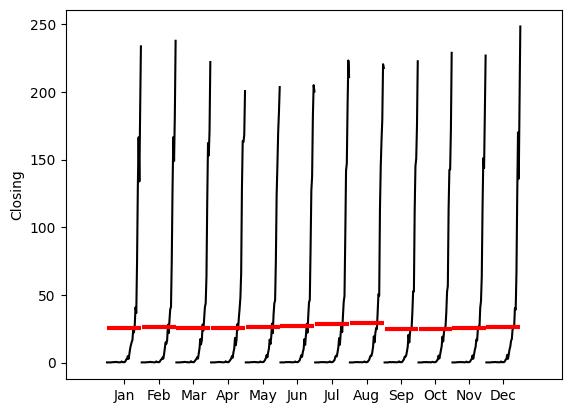

In [40]:
# plotting monthly seasonality
month_plot(aapl_df["Close"].resample("ME").mean(), ylabel="Closing")
plt.show()
# red average through time - important when predicting data.
# black lines represent values for each values for all years.

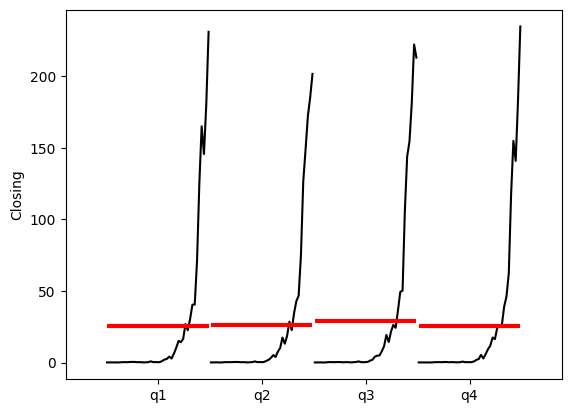

In [41]:
# plotting monthly seasonality
quarter_plot(aapl_df["Close"].resample("QE").mean(), ylabel="Closing")
plt.show()
# red average through time
# black lines represent values for each values for all years.

In [42]:
# given the above did not proivde any sort of seasonality (common with financial stock data it seems), lets load another data set to see what it shows.

choco_df = pd.read_csv("../data/choco_monthly_revenue.csv", parse_dates=["Month with Year"], index_col=["Month with Year"])

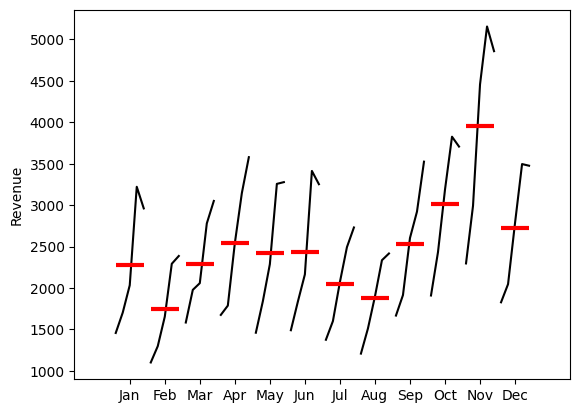

In [43]:
# plotting monthly seasonality
month_plot(choco_df["revenue"].resample("ME").mean(), ylabel="Revenue")
plt.show()

### Decomposition Plot

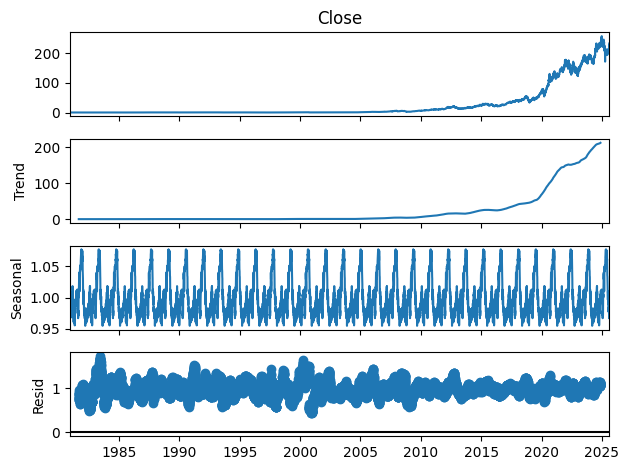

In [44]:
decomposition = seasonal_decompose(aapl_df["Close"], model="multiplicative", period=365)

fig = decomposition.plot()


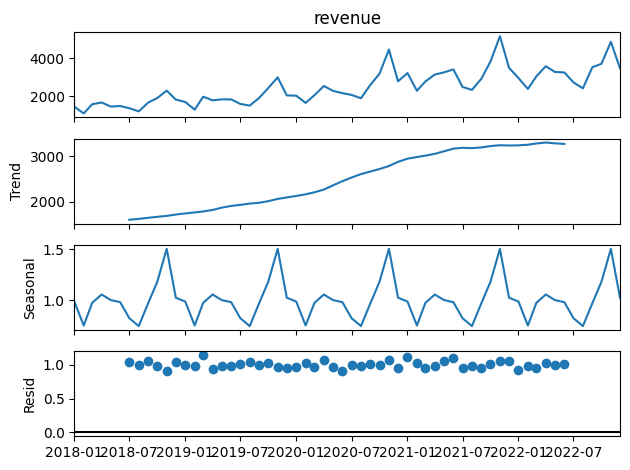

In [45]:
decomposition1 = seasonal_decompose(choco_df["revenue"], model="multiplicative", period=12)

fig = decomposition1.plot()


### Auto Correlation

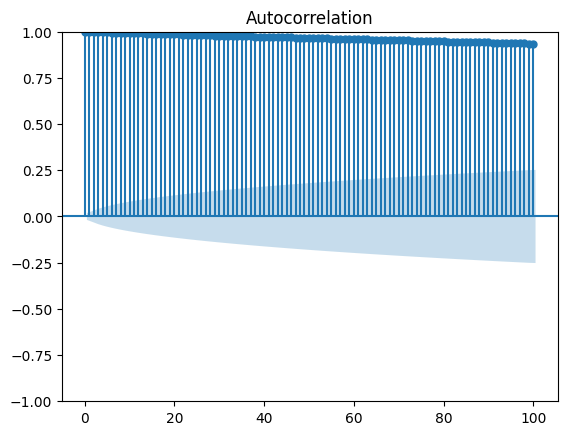

In [46]:
plot_acf(aapl_df["Close"], lags = 100)
plt.show()

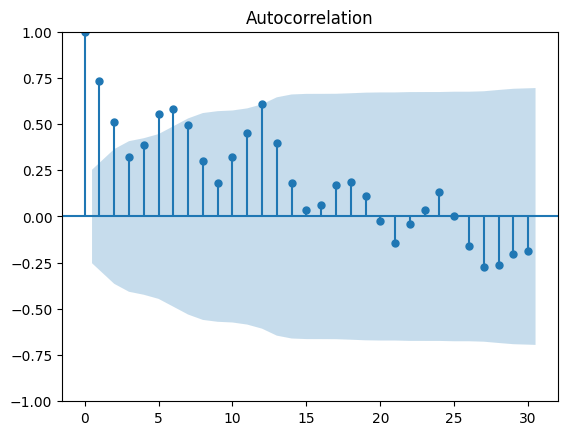

In [47]:
plot_acf(choco_df["revenue"], lags = 30)
plt.show()

## Partial Auto-Correlaton

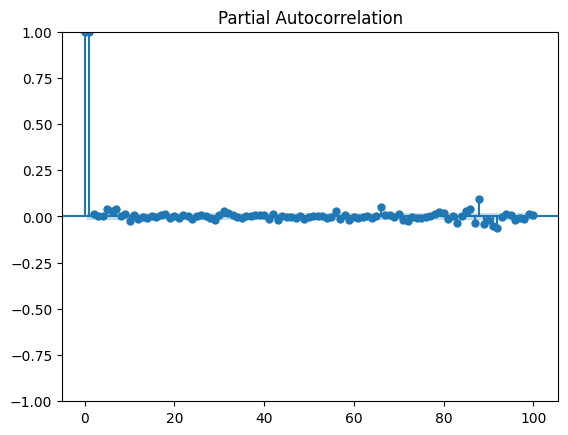

In [48]:
plot_pacf(aapl_df["Close"], lags = 100)
plt.show()
# cannot rely on information from a few days ago

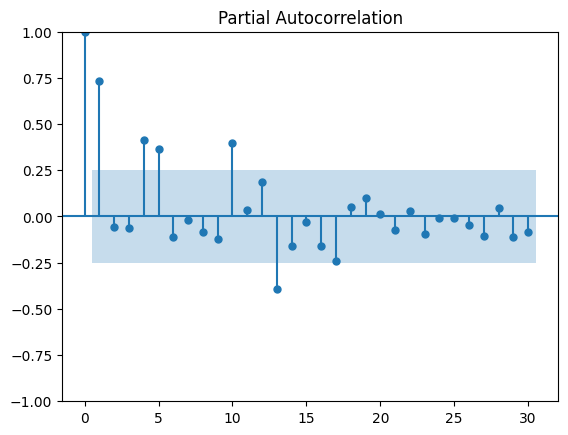

In [49]:
plot_pacf(choco_df["revenue"], lags = 30)
plt.show()